In [9]:
using Pkg;


In [10]:
#Importando los paquetes
Pkg.add("Distributions") # Crear variables "random" aleatorias
Pkg.add("StatsBase") # Soporte de estadistica básica
Pkg.add("CSV") # Escribir y leer archivos CSV
Pkg.add("DataFrames") #Crear nuestra estructura de datos
Pkg.add("HypothesisTests") # Pruebas estadísticas de rendimiento
Pkg.add("StatsPlots") #Librería para graficar
Pkg.add("GLM") #Generar modelos lineales

   Updating registry at `~/.julia/registries/General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...

In [11]:
#Importando los paquetes
using Distributions # Crear variables "random" aleatorias
using StatsBase # Soporte de estadistica básica
using CSV #Escribir y leer archivos CSV
using DataFrames #Crear nuestra estructura de datos
using HypothesisTests # Pruebas estadísticas de rendimiento
using StatsPlots #Librería para graficar
using GLM #Generar modelos lineales


In [12]:
Pkg.add("PyPlot")
pyplot()

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


Plots.PyPlotBackend()

# Creando Varibales Aleatorias

In [13]:
age = rand(18:80, 100); #Distribucuón normal
wcc = round.(rand(Distributions.Normal(12, 2), 100), digits= 1) #distribución normal, redondeando a un décimal
crp = round.(Int, rand(Distributions.Chisq(4), 100)) .*10 #
treatment = rand(["A" , "B"], 100); #Pesos uniformes
result = rand(["Improved", "Static", "Worse"], 100); 

# Estadística Descriptiva


In [14]:
#Obtener la media de la variable AGE
mean(age)

50.24

In [19]:
#Obtener mediana
median(age)

52.0

In [20]:
#Obtener desvación estandar
std(age)

16.819373149178695

In [21]:
#obtener la varianza
var(age)

282.8913131313132

In [15]:
#Estadísitca descriptiva para la variable age
StatsBase.describe(age)

Summary Stats:
Length:         100
Missing Count:  0
Mean:           50.240000
Minimum:        18.000000
1st Quartile:   37.000000
Median:         52.000000
3rd Quartile:   65.000000
Maximum:        80.000000
Type:           Int64


In [18]:
# La función summarystats() omite el tipo de datos
StatsBase.summarystats(wcc)

Summary Stats:
Length:         100
Missing Count:  0
Mean:           12.119000
Minimum:        6.300000
1st Quartile:   10.800000
Median:         12.400000
3rd Quartile:   13.300000
Maximum:        16.800000


# Creando nuestro DataFrame

In [23]:
#Colocando nuestras variables generadas aleatoriamente en un dataframe
data = DataFrame(Age = age, WCC = wcc, CRP = crp, Treatment = treatment, Result = result);
#Mostrando las primeras 5 columnas de nuestros datos
first(data, 5)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,65,14.0,0,B,Worse
2,53,10.0,50,A,Worse
3,54,10.2,100,B,Static
4,54,11.7,60,B,Improved
5,57,13.9,60,A,Improved


In [24]:
#Obteniendo el numero de columnas y filas
size(data)

(100, 5)

In [25]:
#Obteniendo las primeras 6 columnas
head(data)

┌ Warning: `head(df::AbstractDataFrame)` is deprecated, use `first(df, 6)` instead.
│   caller = top-level scope at In[25]:1
└ @ Core In[25]:1


,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,65,14.0,0,B,Worse
2,53,10.0,50,A,Worse
3,54,10.2,100,B,Static
4,54,11.7,60,B,Improved
5,57,13.9,60,A,Improved
6,46,13.0,30,A,Improved


In [42]:
# Podemos crear objetos de nuestros dataframes, seleccionando solo aquellos que queremos procesar o trabajar teniendo en cuenta una variable particular
dataA = data[data[!,:Treatment] .== "A", :]; #obtener los pacientes del tratamiento a
dataB = data[data[!, :Treatment] .== "B", :]#obtener los pacientes del tratamiento b
first(dataB, 5)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,65,14.0,0,B,Worse
2,54,10.2,100,B,Static
3,54,11.7,60,B,Improved
4,45,10.3,40,B,Worse
5,70,12.7,0,B,Improved


# Estadística descriptiva utilizando nuestro objeto -> DataFrame 

In [43]:
#la funcion describe nos entrega información estadística de nuestro set de datos
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Age,50.24,18,52.0,80,,,Int64
2,WCC,12.119,6.3,12.4,16.8,,,Float64
3,CRP,38.6,0,35.0,110,,,Int64
4,Treatment,,A,,B,2,,String
5,Result,,Improved,,Worse,3,,String


In [45]:
#Se pueden contar los elementos en un espacio de ejemplo utilizando la función by() 
# Contando el número de pacientes in los grupos A y B
by(data, :Treatment, df -> DataFrame(N = size(df,1)))

,Treatment,N
,String,Int64
1,B,51
2,A,49


In [46]:
# La función size() nos entrega la misma salida agregando el numero de variables
by(data, :Treatment, size)

,Treatment,x1
,String,Tuple…
1,B,"(51, 5)"
2,A,"(49, 5)"


Usualmente la estádistica descriptiva de una variable numérica puede ser calculada despues de separarse de las variables categóricas

In [48]:
#Calculando la media de la variable AGE en el DATAFRAME de los pacientes de los grupos A y B
by(data, :Treatment, df -> mean(df.Age))

,Treatment,x1
,String,Float64
1,B,50.3725
2,A,50.102


In [49]:
#Calculando la desvasión estandar de la variable AGE en el DATAFRAME de los pacientes de los grupos A y B
by(data, :Treatment, df -> std(df.Age))

,Treatment,x1
,String,Float64
1,B,14.5602
2,A,19.0419


In [54]:
#Podemos usar summarystats() para obtener toda la información básica de estadística descriptiva de la variable en cuestion
by(data, :Treatment, df -> describe(df.Age))

Summary Stats:
Length:         51
Missing Count:  0
Mean:           50.372549
Minimum:        18.000000
1st Quartile:   39.500000
Median:         52.000000
3rd Quartile:   61.000000
Maximum:        75.000000
Type:           Int64
Summary Stats:
Length:         49
Missing Count:  0
Mean:           50.102041
Minimum:        18.000000
1st Quartile:   35.000000
Median:         53.000000
3rd Quartile:   67.000000
Maximum:        80.000000
Type:           Int64


,Treatment,x1
,String,Nothing
1,B,
2,A,


# Visualización de los datos
El paquete `Plots` trabaja muy bien con los DataFrames. En el siguiente código vamos a tener la distribución de la variable `age` respecto a los dos grupos de tratamiento

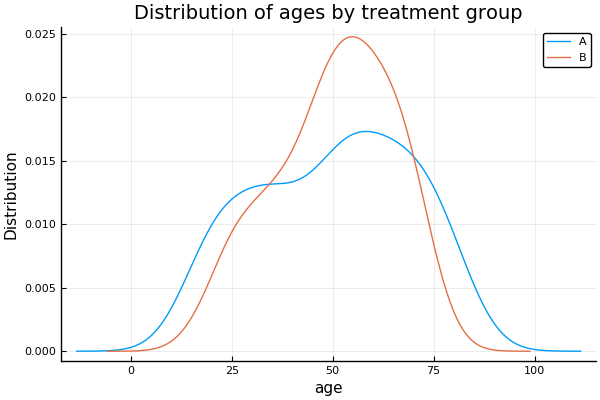

In [64]:
@df data density(:Age, group = :Treatment, title = "Distribution of ages by treatment group", xlab = "age", ylab = "Distribution" , legend = :topright)

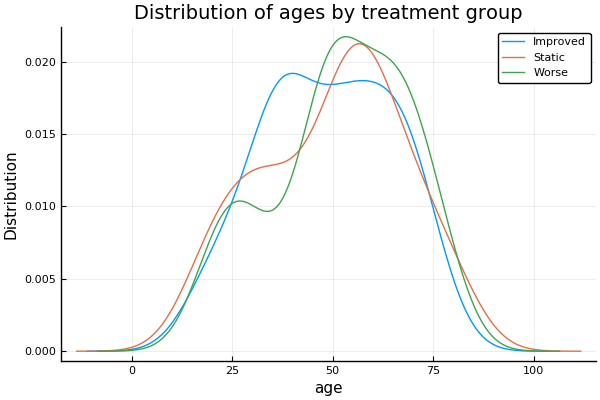

In [65]:
#Podemos hacer lo mismo teniendo en cuenta la variable de resultados
@df data density(:Age, group = :Result, title = "Distribution of ages by result group", xlab = "age", ylab = "Distribution" , legend = :topright)

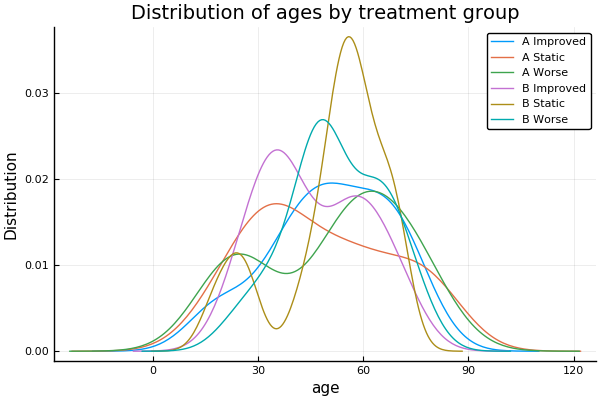

In [66]:
#Podemos discriminar cada uno de los grupos
@df data density(:Age, group = (:Treatment, :Result), title = "Distribution of ages by treatment and result group", xlab = "age", ylab = "Distribution" , legend = :topright)

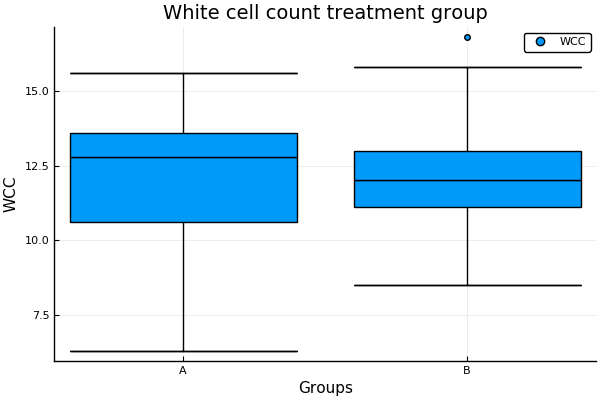

In [67]:
#Podemos graficar un box-and-whisker plot BOX PLOT podemos observar en las siguiente líneas de código, la cuenta de celúlas blancas por grupo de tratamiento y grupo por resultados
@df data boxplot(:Treatment, :WCC, lab = "WCC", title = "White cell count treatment group", xlab= "Groups", ylab="WCC")

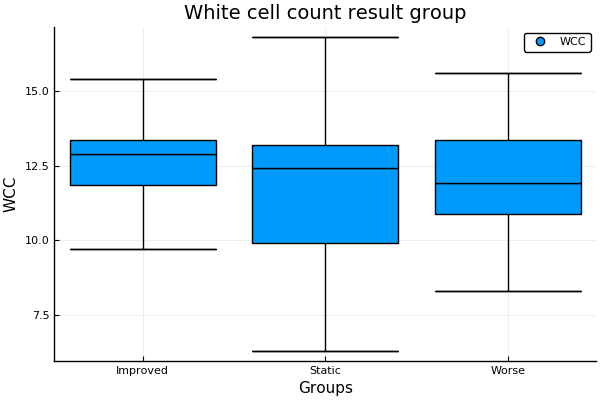

In [68]:
@df data boxplot(:Result, :WCC, lab = "WCC", title = "White cell count result group", xlab= "Groups", ylab="WCC")

Finalmente vamos a observar la correlación entre las variables numéricas usando la gráfica de correlación y corner plot

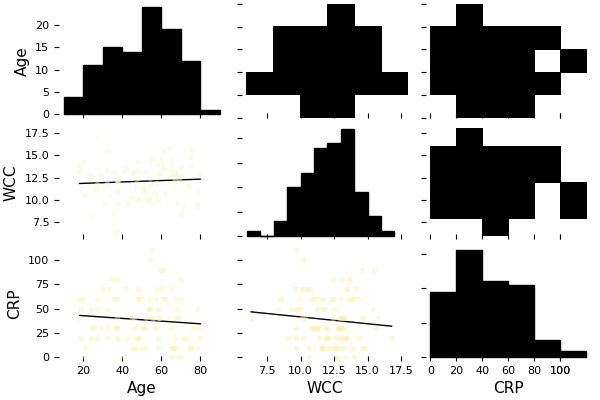

In [71]:
@df data corrplot([:Age :WCC :CRP], grid = false) #No agregar coma entre los elementos en el vector

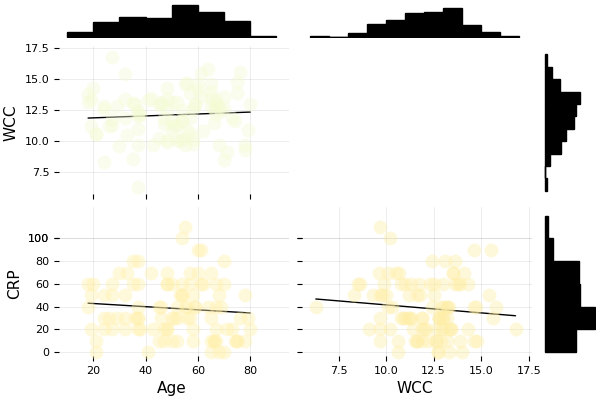

In [73]:
@df data cornerplot([:Age :WCC :CRP], grid = false, compact = true)

# Estadística Inferencial
Vamos a utilizar el `Student's test t` para comparar la media de una variable nuumérica entre los dos grupos

In [76]:
#Diferencia en las edades de los pacientes entre el grupo A y B
HypothesisTests.EqualVarianceTTest(dataA[!,:Age], dataB[!,:Age])

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          -0.27050820328131664
    95% confidence interval: (-6.9811, 6.4401)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.9364

Details:
    number of observations:   [49,51]
    t-statistic:              -0.07999509923285066
    degrees of freedom:       98
    empirical standard error: 3.3815596939747303


In [78]:
pvalue(EqualVarianceTTest(dataA[!,:WCC], dataB[!,:WCC]))

0.9259924813234145

In [79]:
# diferencia en los niveles de proteina reactiva C entre los pacientes A y B para variancia desigual
UnequalVarianceTTest(dataA[!,:CRP], dataA[!,:CRP])

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          0.0
    95% confidence interval: (-9.9476, 9.9476)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           1.0000

Details:
    number of observations:   [49,49]
    t-statistic:              0.0
    degrees of freedom:       96.0
    empirical standard error: 5.01144047257497


Podemos crear una variedad de modelos lineales haciendo uso de `GML.fit()`

In [80]:
#Modelo simple de predicción CRP
fit(LinearModel, @formula(CRP ~ 1), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

CRP ~ 1

Coefficients:
──────────────────────────────────────────────────────────────────────────
             Estimate  Std. Error  t value  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)      38.6     2.44545  15.7844    <1e-28    33.7477    43.4523
──────────────────────────────────────────────────────────────────────────

In [81]:
#Agregando la variable AGE como una variable de predicción
fit(LinearModel, @formula(CRP ~ Age), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

CRP ~ 1 + Age

Coefficients:
─────────────────────────────────────────────────────────────────────────────
              Estimate  Std. Error    t value  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  45.5718       7.74188   5.8864      <1e-7   30.2083     60.9353
Age          -0.138769     0.1462   -0.949172    0.3449  -0.428899    0.15136
─────────────────────────────────────────────────────────────────────────────

In [82]:
#Agregando la variable AGE y la variable WCC como una variables de predicción
fit(LinearModel, @formula(CRP ~ Age + WCC), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

CRP ~ 1 + Age + WCC

Coefficients:
────────────────────────────────────────────────────────────────────────────
             Estimate  Std. Error    t value  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  61.0715    17.386      3.51269     0.0007  26.5652    95.5779
Age          -0.12848    0.146571  -0.876566    0.3829  -0.419383   0.162424
WCC          -1.32162    1.32735   -0.995685    0.3219  -3.95604    1.3128
────────────────────────────────────────────────────────────────────────────